# Spam Email Detector using multiple ML models with kaggle dataset

1. Dowload dataset

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [2]:
file_path = "/content/sample_data/spambase.csv"


In [3]:
# Download latest version
path = kagglehub.dataset_download("colormap/spambase")

print("Path to dataset files:", path)

100%|██████████| 138k/138k [00:00<00:00, 22.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/colormap/spambase/versions/1


In [ ]:
!mv path /content

2. Import neccesary libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


3. load the data

In [6]:
df = pd.read_csv('/content/1/spambase.csv')
# Display the dataframe
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
print(df.shape)

(4601, 58)


In [8]:
# show information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

4. Split Dataset

In [9]:
# Split dataset into training (70%) and testing (30%)
X = df.drop('spam', axis=1)
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5. Train and Evaluation with Multiple models

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier

In [11]:
# KNN (Euclidean)
knn1_model = KNeighborsClassifier(n_neighbors=5)
knn1_model.fit(X_train, y_train)
knn1_pred = knn1_model.predict(X_test)

In [12]:
# KNN (Cosine Distance, 'brute' algorithm)
knn2_model = KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='cosine')
knn2_model.fit(X_train, y_train)
knn2_pred = knn2_model.predict(X_test)

In [13]:
#  Logistic Regression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [26]:
# SVM(linear)
svm_model = SVC(kernel = "linear", random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [15]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [16]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [17]:
# Naive Bayes (Gaussian)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [18]:
# Naive Bayes(Multinomial)
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)


In [19]:
# Neutral Network
nn_model = MLPClassifier(random_state=42,)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

In [20]:
# Gradient Booting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

KNN(Euclidean): 0.782041998551774
          Not-spam  Spam
Not-spam       676   128
Spam           173   404
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       804
           1       0.76      0.70      0.73       577

    accuracy                           0.78      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381

--------------------------------------------------------------------


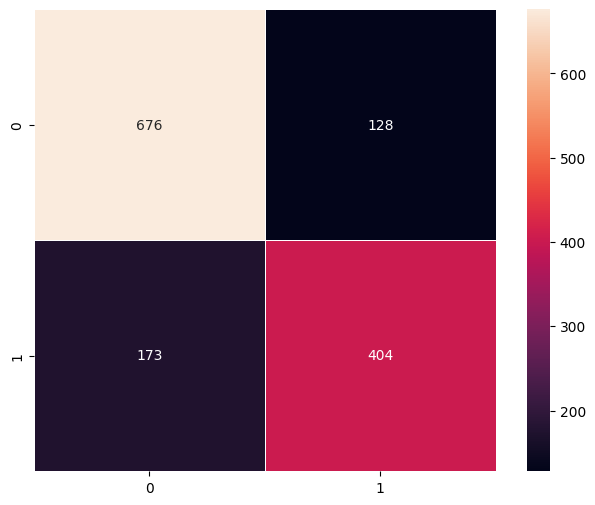




KNN(Cosine Distance): 0.8247646632874729
          Not-spam  Spam
Not-spam       646   158
Spam            84   493
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       804
           1       0.76      0.85      0.80       577

    accuracy                           0.82      1381
   macro avg       0.82      0.83      0.82      1381
weighted avg       0.83      0.82      0.83      1381

--------------------------------------------------------------------


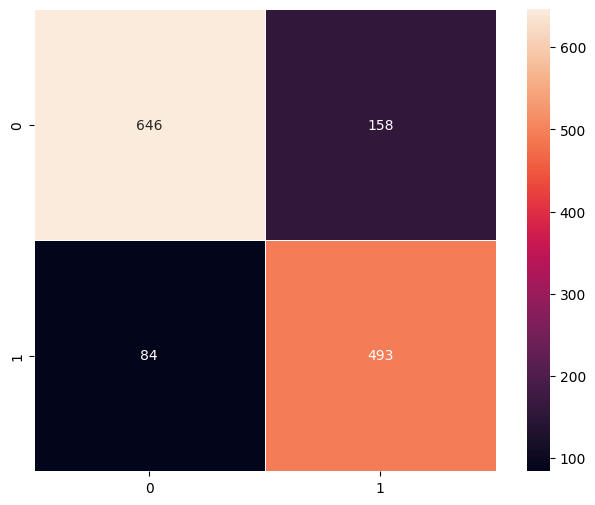




Logistic Regression: 0.9333816075307748
          Not-spam  Spam
Not-spam       772    32
Spam            60   517
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       804
           1       0.94      0.90      0.92       577

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381

--------------------------------------------------------------------


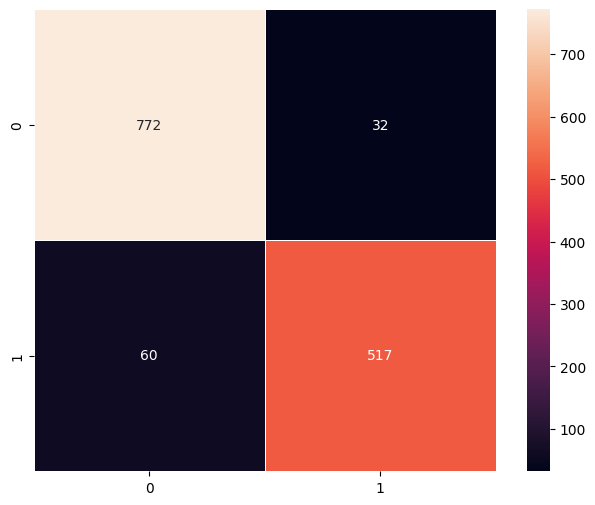




SVM(linear): 0.9275887038377987
          Not-spam  Spam
Not-spam       766    38
Spam            62   515
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       804
           1       0.93      0.89      0.91       577

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381

--------------------------------------------------------------------


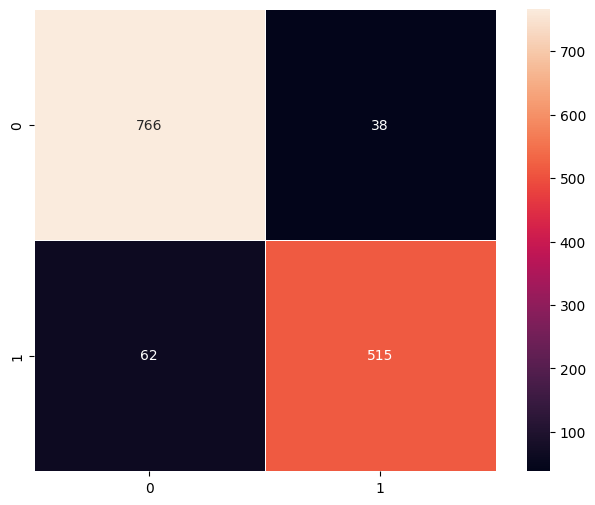




Decision Tree: 0.8993482983345402
          Not-spam  Spam
Not-spam       735    69
Spam            70   507
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       804
           1       0.88      0.88      0.88       577

    accuracy                           0.90      1381
   macro avg       0.90      0.90      0.90      1381
weighted avg       0.90      0.90      0.90      1381

--------------------------------------------------------------------


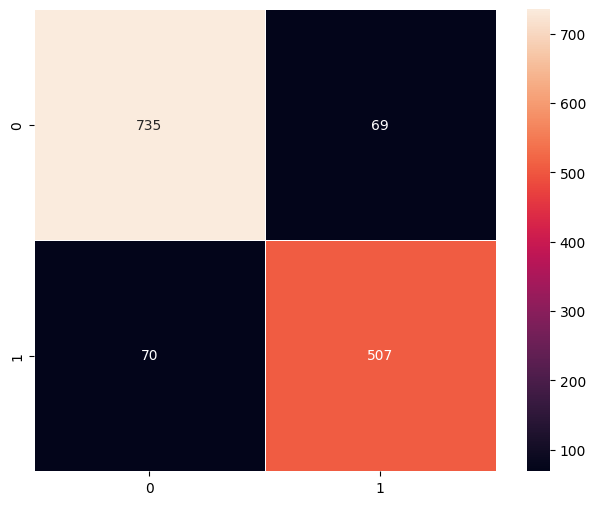




Random Forest: 0.9565532223026793
          Not-spam  Spam
Not-spam       786    18
Spam            42   535
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       804
           1       0.97      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381

--------------------------------------------------------------------


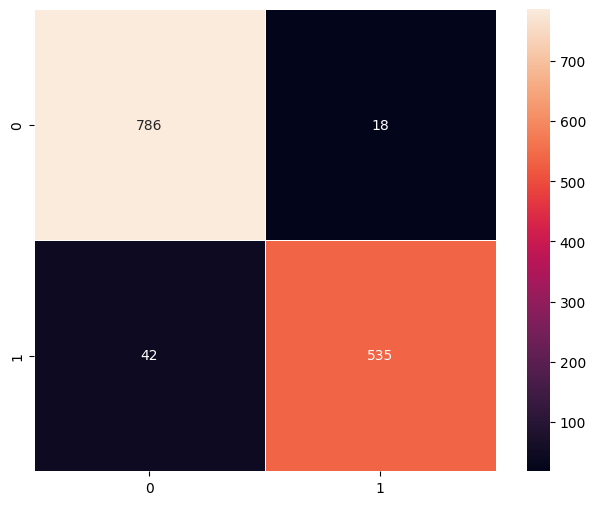




Naive Bayes(Gaussian): 0.8247646632874729
          Not-spam  Spam
Not-spam       592   212
Spam            30   547
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83       804
           1       0.72      0.95      0.82       577

    accuracy                           0.82      1381
   macro avg       0.84      0.84      0.82      1381
weighted avg       0.86      0.82      0.83      1381

--------------------------------------------------------------------


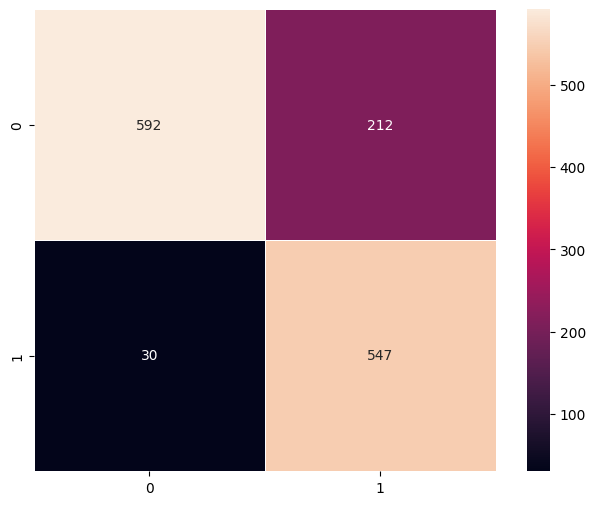




Naive Bayes(Multinomial): 0.782041998551774
          Not-spam  Spam
Not-spam       679   125
Spam           176   401
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       804
           1       0.76      0.69      0.73       577

    accuracy                           0.78      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381

--------------------------------------------------------------------


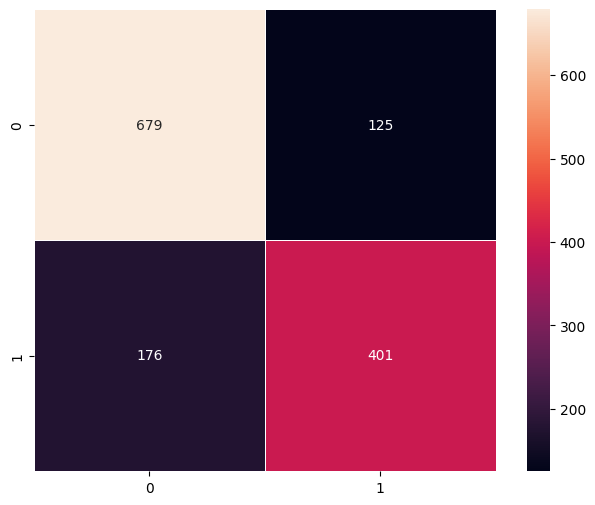




MLP: 0.9181752353367125
          Not-spam  Spam
Not-spam       732    72
Spam            41   536
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       804
           1       0.88      0.93      0.90       577

    accuracy                           0.92      1381
   macro avg       0.91      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381

--------------------------------------------------------------------


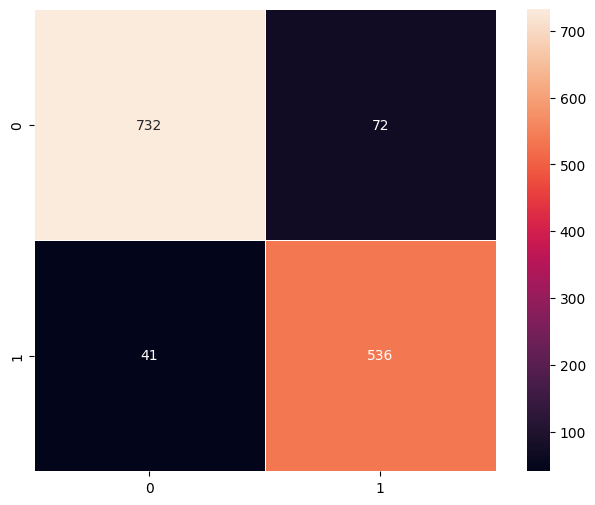




Gradient Booting: 0.946415640839971
          Not-spam  Spam
Not-spam       776    28
Spam            46   531
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       804
           1       0.95      0.92      0.93       577

    accuracy                           0.95      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.95      0.95      0.95      1381

--------------------------------------------------------------------


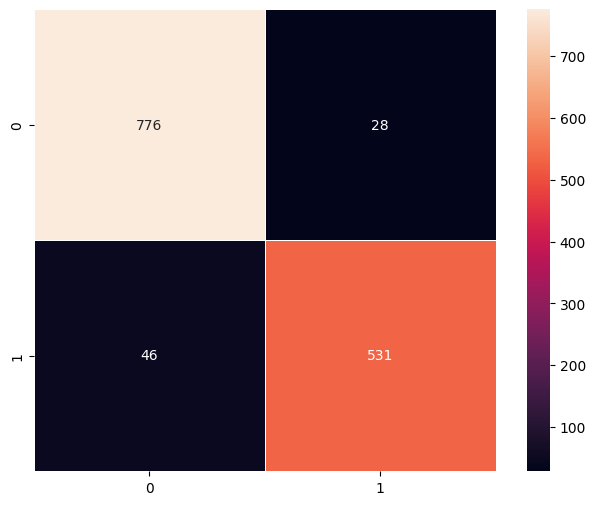

In [27]:
models = ['KNN(Euclidean)', 'KNN(Cosine Distance)', 'Logistic Regression', 'SVM(linear)', 'Decision Tree', 'Random Forest','Naive Bayes(Gaussian)', 'Naive Bayes(Multinomial)', 'MLP','Gradient Booting']
predictions = [knn1_pred, knn2_pred, lr_pred, svm_pred, dt_pred, rf_pred, nb_pred, mnb_pred, nn_pred, gb_pred]

accuracies = []

for model, pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    classification_rep = classification_report(y_test, pred)

    accuracies.append(accuracy)
    print(f"{model}: {accuracy}")
    print(pd.DataFrame(conf_matrix, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
    print("Classification Report:\n", classification_rep)
    print("--------------------------------------------------------------------")

    # confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=0.5, square=True)
    plt.show()
    print("\n"*2)

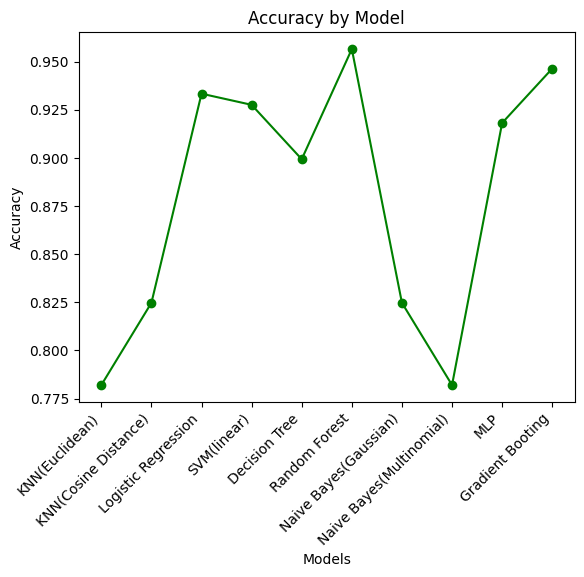

In [28]:
plt.plot(models, accuracies, marker='o', color='green', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy by Model')
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

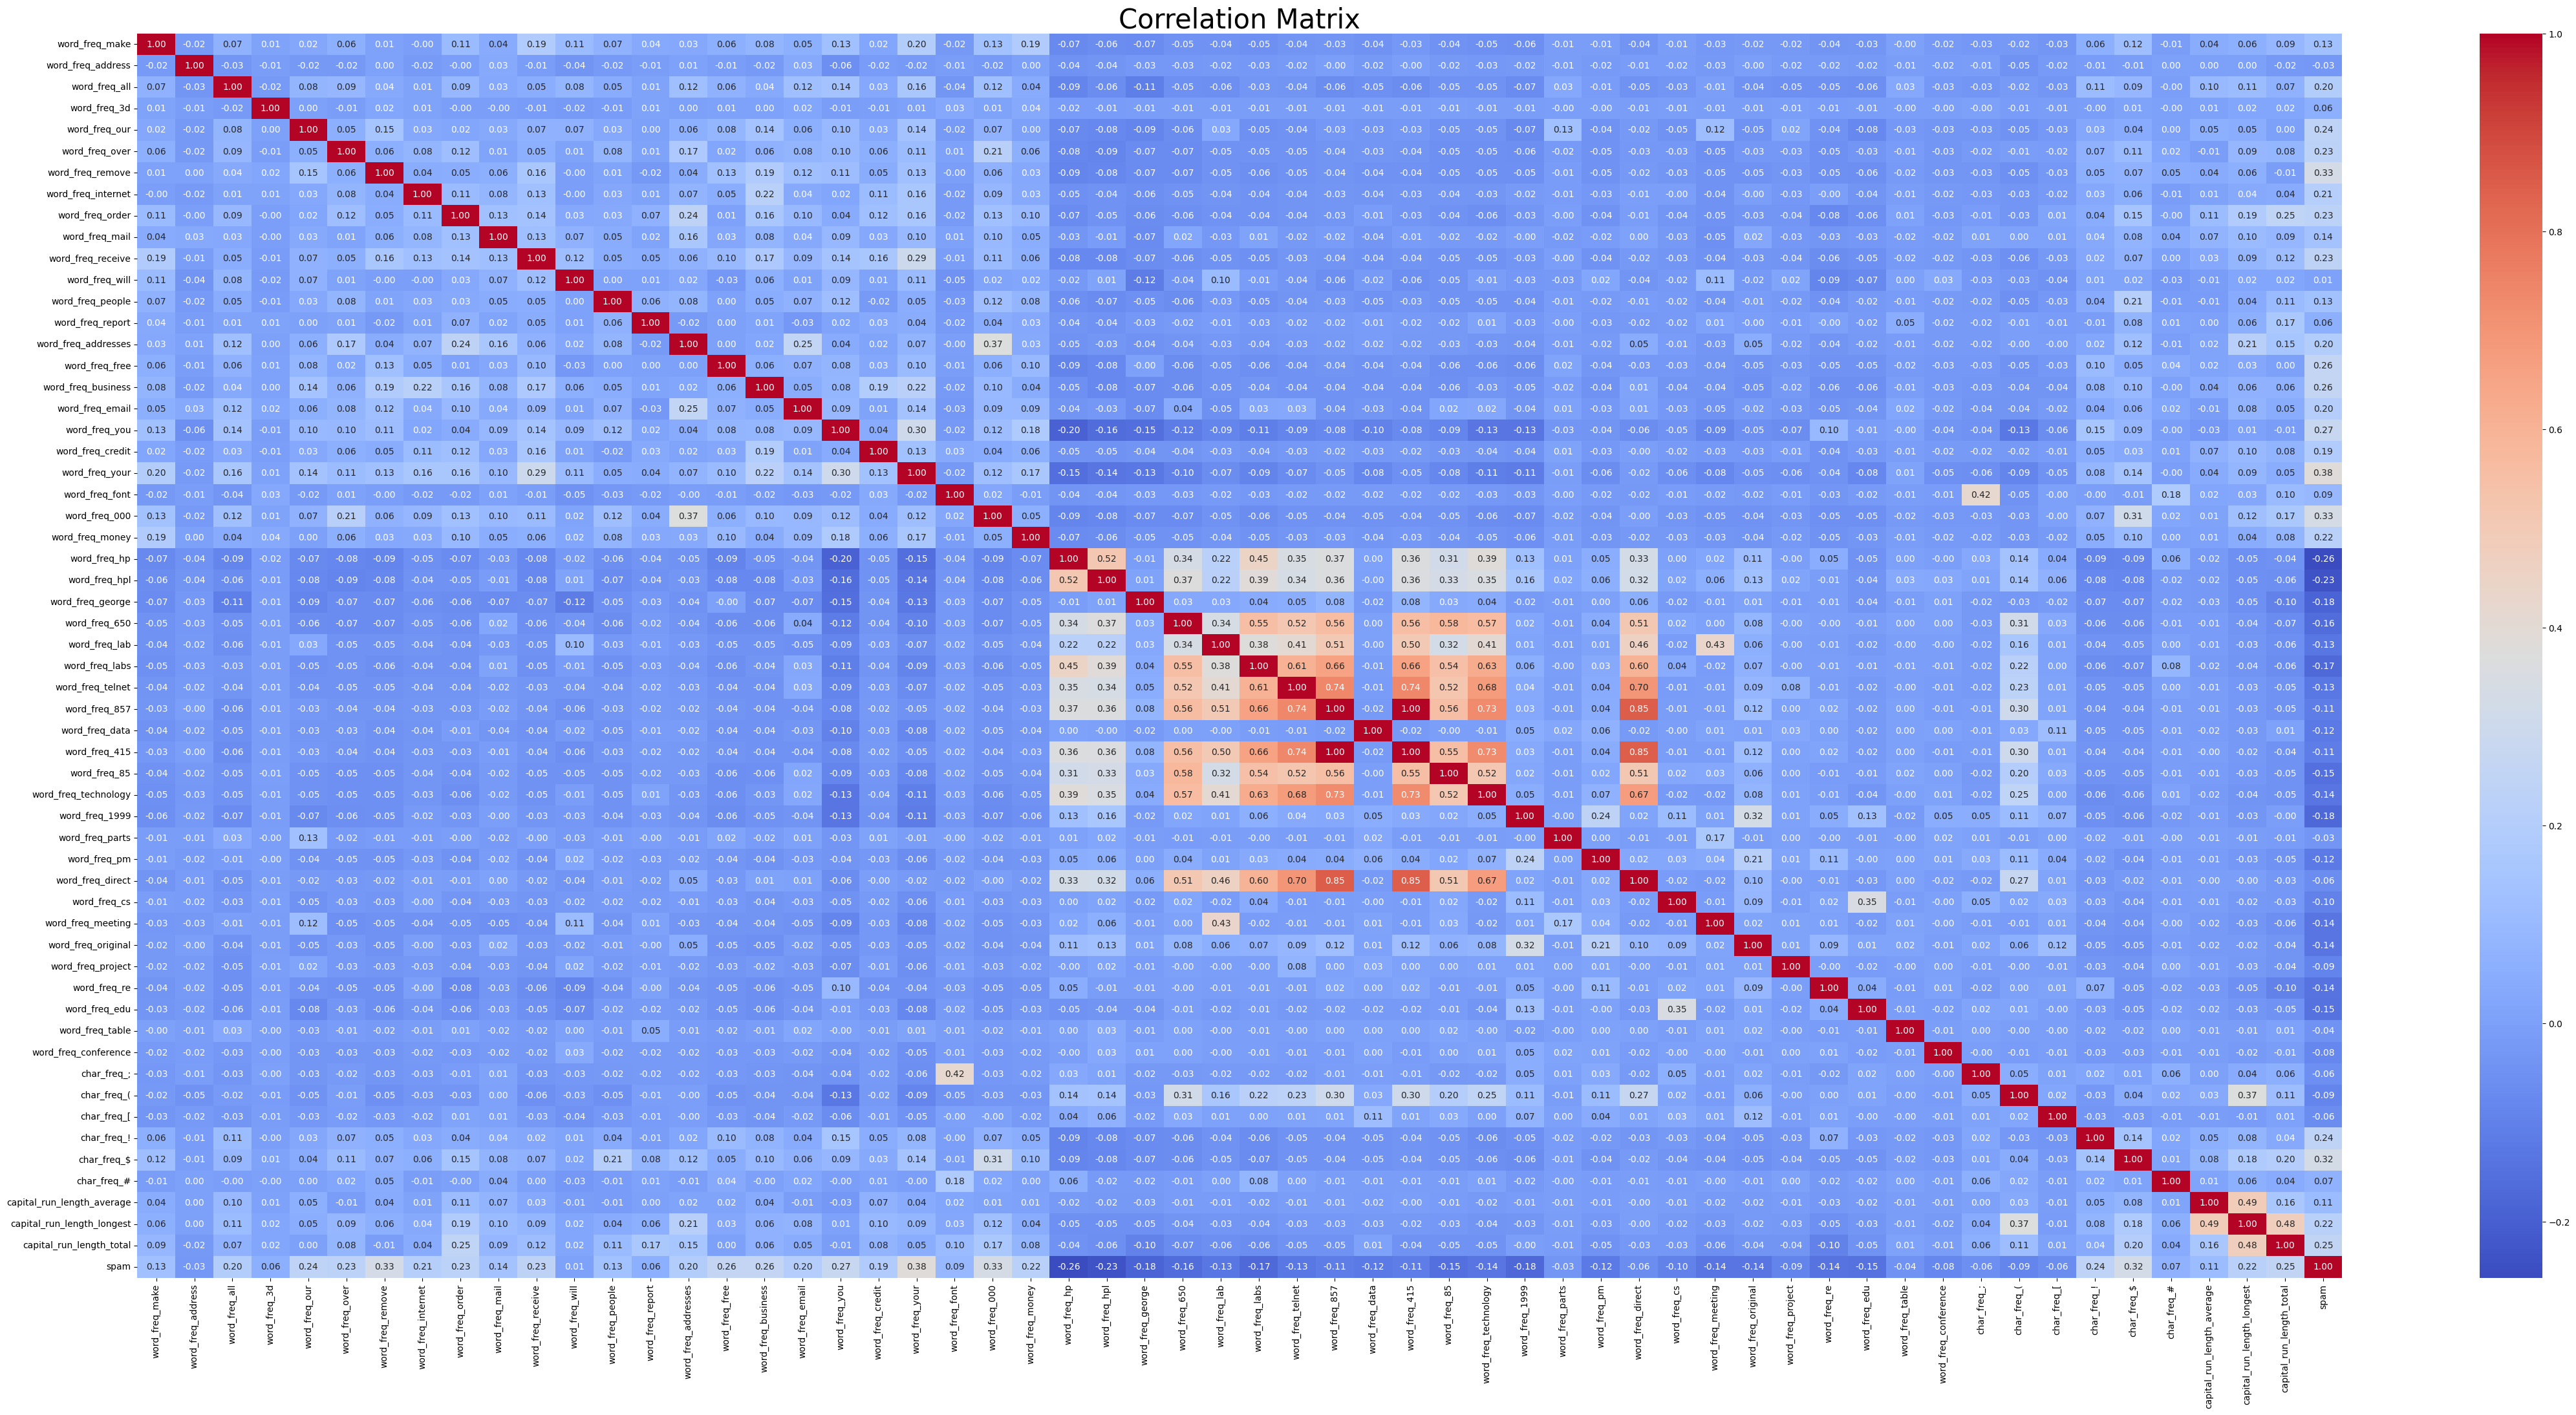

In [29]:
plt.figure(figsize=(55, 25))
sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Matrix', fontsize=30)